This notebook generates the images related to the synthetic elections generated by Mallows Models.

In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import cluster
from sklearn.metrics import silhouette_score

import sys
sys.path.append('..')
from Clustering_Functions import *

In [2]:
def Sil_scores(election, num_cands='Auto'):
    """
    returns the silhouette score of the k-means clustering of the given election for k=2,3,4,5.

    Returns: dictionary of silhouette scores for k=2,3,4,5 
    """
    if num_cands == 'Auto':
        num_cands = max([item for ranking in election.keys() for item in ranking])
    X = np.array([Borda_vector(ballot, num_cands=num_cands) for ballot in election.keys()])
    sample_weight = np.array([election[ballot] for ballot in election.keys()])

    sil_scores = dict()
    for k in range(2,6):
        kmeans = cluster.KMeans(n_clusters=k, n_init = 200).fit(X,sample_weight=sample_weight)
        labels = kmeans.labels_
        sil_scores[k] = (silhouette_score(X,labels))   
    return sil_scores

In [8]:
def Mod_scores(election, num_cands = 'Auto'):
    """
    returns the modularity modularity-clustering of the given election for k=2,3,4,5 pieces.

    Returns: dictionary of moduarities for k=2,3,4,5 
    """
    if num_cands == 'Auto':
        num_cands = max([item for ranking in election.keys() for item in ranking])

    mod_scores = dict()
    for k in range(2,6):
        C, mod = Modularity_cluster(election, k, num_cands=num_cands, method='greedy',return_modularity=True)
        mod_scores[k] = mod   
    return mod_scores

In [4]:
E1,C1 = Mallows_election(num_cands=9, num_clusters=1, centers=[[1,2,3,4,5,6,7,8,9]], sizes=[1000], p=.5)
E2,C2 = Mallows_election(num_cands=9, num_clusters=2, centers=[[1,2,3,4,5,6,7,8,9], [8,7,5,9,6,3,2,1,4]], 
                         sizes=[300, 700], p=.5)
E3,C3 = Mallows_election(num_cands=9, num_clusters=3, centers=[[1,2,3,4,5,6,7,8,9], [4,6,5,1,8,2,7,3,9], [7,8,9,4,5,6,3,2,1]],
                          sizes=[200, 200, 600], p=.5) 

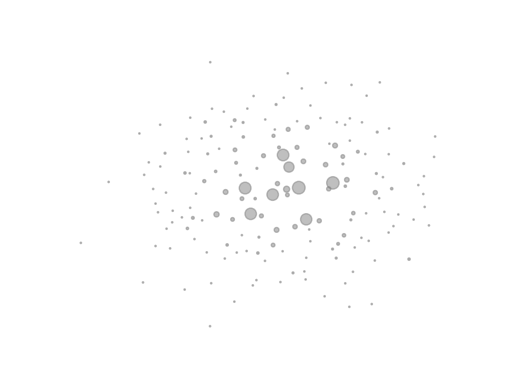

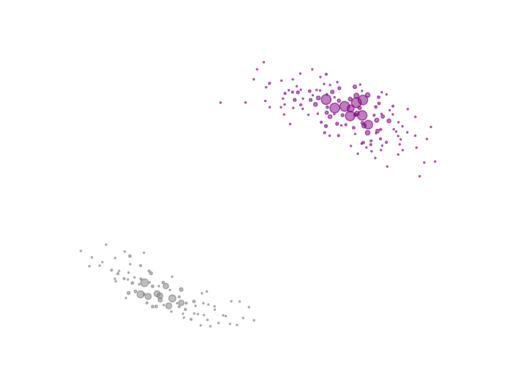

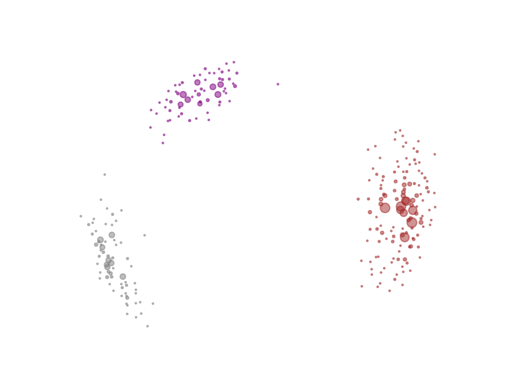

In [5]:
Ballot_MDS_plot(E1,C1, threshold = 1, filename = None)
Ballot_MDS_plot(E2,C2, threshold = 1, filename = None)
Ballot_MDS_plot(E3,C3, threshold = 1, filename = None)

In [9]:
S1 = Sil_scores(E1)
S2 = Sil_scores(E2)
S3 = Sil_scores(E3)
M1 = Mod_scores(E1)
M2 = Mod_scores(E2)
M3 = Mod_scores(E3)

KeyboardInterrupt: 

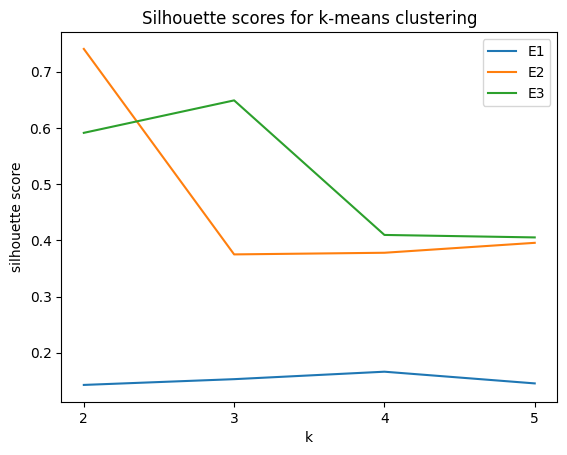

In [ ]:
p_range = [2, 3, 4, 5]
plt.plot(p_range, [S1[k] for k in p_range], label='E1')
plt.plot(p_range, [S2[k] for k in p_range], label='E2')
plt.plot(p_range, [S3[k] for k in p_range], label='E3')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette scores for k-means clustering')
plt.legend()
plt.xticks(p_range)  # Set the tick marks at 2, 3, 4, and 5
#plt.savefig('Silhouette_vs_k.jpg', dpi = 600)
plt.show()

In [6]:
p_range = [2, 3, 4, 5]
plt.plot(p_range, [M1[k] for k in p_range], label='E1')
plt.plot(p_range, [M2[k] for k in p_range], label='E2')
plt.plot(p_range, [M3[k] for k in p_range], label='E3')
plt.xlabel('k')
plt.ylabel('modularity')
plt.title('modularity clustering with k clusters')
plt.legend()
plt.xticks(p_range)  # Set the tick marks at 2, 3, 4, and 5
#plt.savefig('Modularity_vs_k.jpg', dpi = 600)
plt.show()

NameError: name 'M1' is not defined

In [85]:
print(1,M1)
print(2,M2)
print(3,M3)

1 {2: 0.008322877744650799, 3: 0.009250192581078696, 4: 0.009247562540211994, 5: 0.009243030959018022}
2 {2: 0.21940187295361402, 3: 0.21934989211593148, 4: 0.21928538763698938, 5: 0.2192143251216518}
3 {2: 0.24152263997646448, 3: 0.241665267510435, 4: 0.24160892897298195, 5: 0.2415488390340745}


In [86]:
C1_mod, C1_mod_score = Modularity_cluster(E1, return_modularity=True)
C2_mod, C2_mod_score = Modularity_cluster(E2, return_modularity=True)
C3_mod, C3_mod_score = Modularity_cluster(E3, return_modularity=True)

In [82]:
len(C1_mod), len(C2_mod), len(C3_mod)

(3, 2, 3)

In [26]:
election, C = Mallows_election(num_cands=5, num_clusters=2, centers=[[1,2,3,4,5], [5,4,3,2,1]], sizes=[300, 700], p=.3)

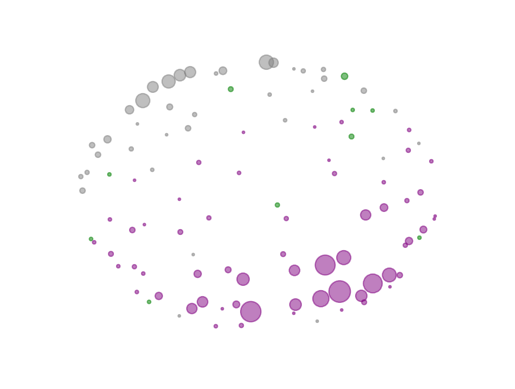

In [51]:
Ballot_MDS_plot(election, C, threshold=1, filename='Mallows_MDS.jpg', dpi=600)

In [40]:
C_means = kmeans(election)
C_med, medoids = kmedoids(election, return_medoids=True)
C_slate = Slate_cluster(election)
C_mod = Modularity_cluster(election)

Slate = (5,).


In [42]:
print(medoids)

[(5, 4, 3, 2, 1), (1, 2, 3, 4, 5)]


In [41]:
trials = [C_means, C_med, C_slate, C_mod]
for trial in trials:
    size = sum(trial[0].values())/sum(election.values())
    print(f"error = {Clustering_closeness(election, C,trial)}, size = {min(size, 1-size)}." )

error = 0.04, size = 0.31599999999999995.
error = 0.029, size = 0.3155.
error = 0.082, size = 0.3405.
error = 0.085, size = 0.373.


In [52]:
trials = [C_means, C_med, C_slate, C_mod]
for trial in trials:
    print(f"error = {Clustering_closeness(election, C_med ,trial)}." )

error = 0.031.
error = 0.0.
error = 0.0785.
error = 0.073.


In [53]:
Sil_scores(election)

{2: 0.18823232490104821,
 3: 0.17915795880563704,
 4: 0.17173075580274852,
 5: 0.18766966589335696}

In [57]:
Mod_scores(election)

{2: 0.13741720544348102,
 3: 0.1374133263928263,
 4: 0.13740701228190744,
 5: 0.13739853756491816}

In [18]:
p_range = np.arange(.02,.5,.02)
sil = []
mod = []
mod_num = []
closeness_mod = []
closeness_kmeans = []
closeness_med = []
closeness_slate = []
misclassified = []
medoid_dist = []
for p in p_range:
    print(p)
    election, C_truth = Mallows(num_cands=9, num_clusters=2, 
                          centers=[[1,2,3,4,5,6,7,8,9], [8,7,5,9,6,3,2,1,4]], sizes=[300, 700], p=p)
    C_mod, modularity = Modularity_cluster(election, return_modularity=True)
    C_mod_2 = Modularity_cluster(election, k=2)
    C_kmeans = kmeans(election)
    C_med, medoids = kmedoids(election, return_medoids=True)
    print(medoids)
    medoid_dist.append(Borda_dist(medoids[0], (1,2,3,4,5,6,7,8,9), num_cands=9) + Borda_dist(medoids[1], (8,7,5,9,6,3,2,1,4), num_cands=9))
    C_slate = Slate_cluster(election)
    closeness_mod.append(Clustering_closeness(election, C_truth, C_mod_2))
    closeness_kmeans.append(Clustering_closeness(election, C_truth, C_kmeans))
    closeness_med.append(Clustering_closeness(election, C_truth, C_med))
    closeness_slate.append(Clustering_closeness(election, C_truth, C_slate))
    mod.append(modularity)
    mod_num.append(len(C_mod))
    sil_scores = Sil_scores(election)
    sil.append(sil_scores)
    score0 = 0
    score1 = 0
    for ballot, weight in C_truth[0].items():
        d0 = Borda_dist(ballot, (1,2,3,4,5,6,7,8,9), num_cands=9)
        d1 = Borda_dist(ballot, (8,7,5,9,6,3,2,1,4), num_cands=9)
        if d1<d0:
            score0 += weight
        else:
            score1 += weight
    for ballot, weight in C_truth[1].items():
        d0 = Borda_dist(ballot, (1,2,3,4,5,6,7,8,9), num_cands=9)
        d1 = Borda_dist(ballot, (8,7,5,9,6,3,2,1,4), num_cands=9)
        if d0<d1:
            score0 += weight
        else:
            score1 += weight
    misclassified.append(min(score0,score1)/sum(election.values()))

0.02
[(8, 7, 5, 9, 6, 3, 2, 1, 4), (1, 2, 3, 4, 5, 6, 7, 8, 9)]
Slate = (8,).
0.04
[(8, 7, 5, 9, 6, 3, 2, 1, 4), (1, 2, 3, 4, 5, 6, 7, 8, 9)]
Slate = (8,).
0.06
[(1, 2, 3, 4, 5, 6, 7, 8, 9), (8, 7, 5, 9, 6, 3, 2, 1, 4)]
Slate = (8,).
0.08
[(1, 2, 3, 4, 5, 6, 7, 8, 9), (8, 7, 5, 9, 6, 3, 2, 1, 4)]
Slate = (8,).
0.1
[(8, 7, 5, 9, 6, 3, 2, 1, 4), (1, 2, 3, 4, 5, 6, 7, 8, 9)]
Slate = (8,).
0.12000000000000001
[(8, 7, 5, 9, 6, 3, 2, 1, 4), (1, 2, 3, 4, 5, 6, 7, 8, 9)]
Slate = (8,).
0.13999999999999999
[(8, 7, 5, 9, 6, 3, 2, 1, 4), (1, 2, 3, 4, 5, 6, 7, 8, 9)]
Slate = (8,).
0.16
[(8, 7, 5, 9, 6, 3, 2, 1, 4), (1, 2, 3, 4, 5, 6, 7, 8, 9)]
Slate = (8,).
0.18
[(8, 7, 5, 9, 6, 3, 2, 1, 4), (1, 2, 3, 4, 5, 6, 7, 8, 9)]
Slate = (1, 2, 3, 4).
0.19999999999999998
[(8, 7, 5, 9, 6, 3, 2, 1, 4), (1, 2, 3, 4, 5, 6, 7, 8, 9)]
Slate = (1, 2, 3, 4).
0.22
[(1, 2, 3, 4, 5, 6, 7, 8, 9), (8, 7, 5, 9, 6, 3, 2, 1, 4)]
Slate = (1, 2, 3, 4).
0.24
[(1, 2, 3, 4, 5, 6, 7, 8, 9), (8, 7, 5, 9, 6, 3, 2, 1, 4)]
Slate = (1

In [19]:
mod_num

[3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

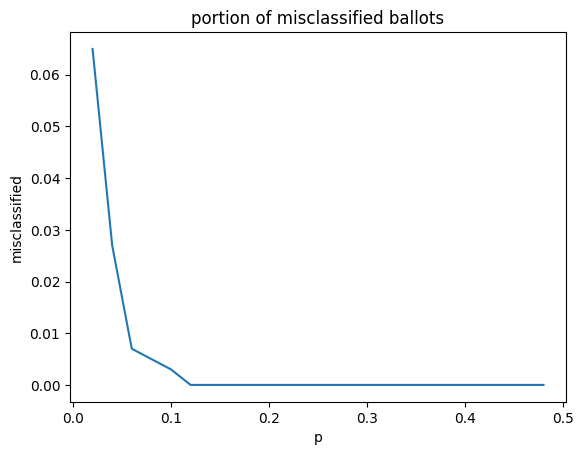

In [20]:
plt.plot(p_range, misclassified)
plt.xlabel('p')
plt.ylabel('misclassified')
plt.title('portion of misclassified ballots')
plt.show()

In [22]:
misclassified

[0.065,
 0.027,
 0.007,
 0.005,
 0.003,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

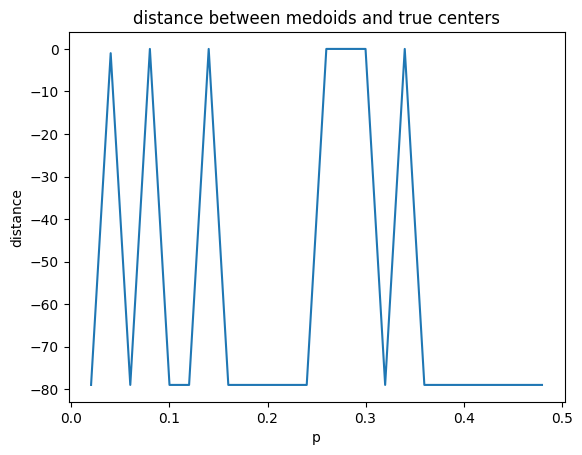

In [15]:
med_dist = [min(x,1-x) for x in medoid_dist]
plt.plot(p_range, med_dist)
plt.xlabel('p')
plt.ylabel('distance')
plt.title('distance between medoids and true centers')
plt.show()

In [13]:
medoid_dist

[80.0,
 2.0,
 80.0,
 0.0,
 80.0,
 80.0,
 0.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 0.0,
 0.0,
 0.0,
 80.0,
 0.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0]

In [11]:
p_range

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48])

In [12]:
medoids[0]

(8, 7, 5, 9, 6, 3, 2, 1, 4)

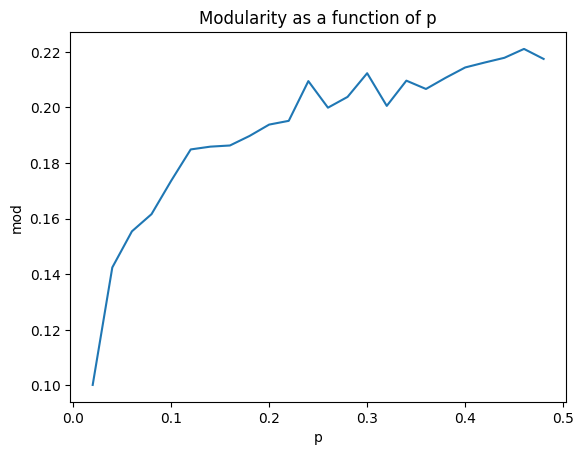

In [13]:
# Create the plot
plt.plot(p_range, mod)
plt.xlabel('p')
plt.ylabel('mod')
plt.title('Modularity as a function of p')
plt.savefig('Modularity_vs_p.jpg')
plt.show()

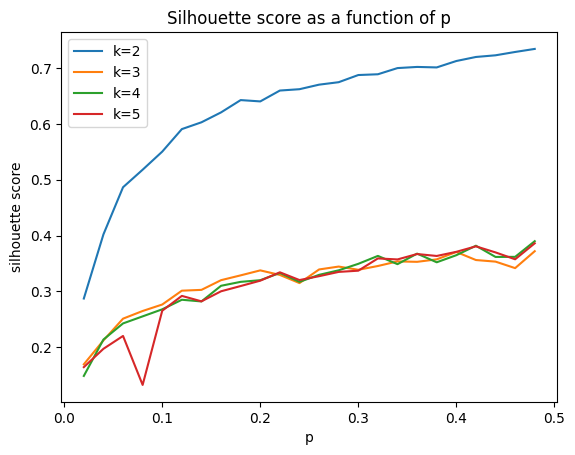

In [14]:
for k in range(2,6):
    plt.plot(p_range, [sil_scores[k] for sil_scores in sil], label=f'k={k}')
plt.xlabel('p')
plt.ylabel('silhouette score')
plt.title('Silhouette score as a function of p')
plt.legend()
plt.savefig('Silhouette_vs_p.jpg')
plt.show()

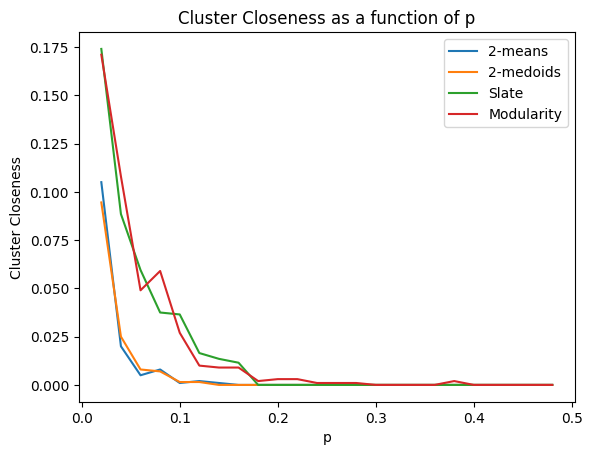

In [15]:
plt.plot(p_range, closeness_kmeans, label="2-means")
plt.plot(p_range, closeness_med, label="2-medoids")
plt.plot(p_range, closeness_slate, label="Slate")
plt.plot(p_range, closeness_mod, label="Modularity")

plt.xlabel('p')
plt.ylabel('Cluster Closeness')
plt.title('Cluster Closeness as a function of p')
plt.legend()
plt.savefig('Closeness.jpg')
plt.show()